# Analyze broken bus runs 
* uses 4 month data (Jan-Apr 2015)

In [1]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
%matplotlib inline

In [2]:
bruns = pd.read_csv('../data/4mo_broken_buses.csv', index_col=0)
bruns.head(10)

,Run,ServiceDate
0,9705,0015-01-01
1,9708,0015-01-01
2,9716,0015-01-01
3,8702,0015-01-01
4,8706,0015-01-01
5,8711,0015-01-01
6,8730,0015-01-01
7,8712,0015-01-01
8,8729,0015-01-01
9,8714,0015-01-01


In [3]:
dates = bruns.ServiceDate.drop_duplicates()
dates.head(10)

0     0015-01-01
16    0015-01-31
17    0015-02-01
18    0015-02-08
19    0015-02-22
20    0015-03-28
21    0015-04-11
23    0015-04-21
25    0015-01-05
26    0015-01-09
Name: ServiceDate, dtype: object

In [4]:
dates = dates.apply(lambda x: '2' + x[1:])
dates.index = range(len(dates))
dates.head(10)

0    2015-01-01
1    2015-01-31
2    2015-02-01
3    2015-02-08
4    2015-02-22
5    2015-03-28
6    2015-04-11
7    2015-04-21
8    2015-01-05
9    2015-01-09
Name: ServiceDate, dtype: object

In [5]:
bruns.ServiceDate = bruns.ServiceDate.apply(lambda x: '2' + x[1:])

In [6]:
count = dates.apply(lambda x: len(bruns.ServiceDate[bruns.ServiceDate == x]))
count.name = 'Count'

In [7]:
count[0:10]

0    18
1    14
2    20
3    38
4    20
5    14
6    21
7    42
8    45
9    25
Name: Count, dtype: int64

In [8]:
countFrame = pd.concat([dates, count],axis=1)
countFrame[countFrame.Count > 40].head(10)

,ServiceDate,Count
7,2015-04-21,42
8,2015-01-05,45
10,2015-01-13,49
27,2015-04-30,42
28,2015-01-20,43
47,2015-01-06,48
48,2015-01-08,41
61,2015-01-07,46
67,2015-04-24,50
69,2015-03-12,58


In [9]:
countFrame.ServiceDate = pd.to_datetime(countFrame.ServiceDate)
countFrame.sort('ServiceDate', inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [10]:
print len(countFrame.ServiceDate)
print len(countFrame.Count)

120
120


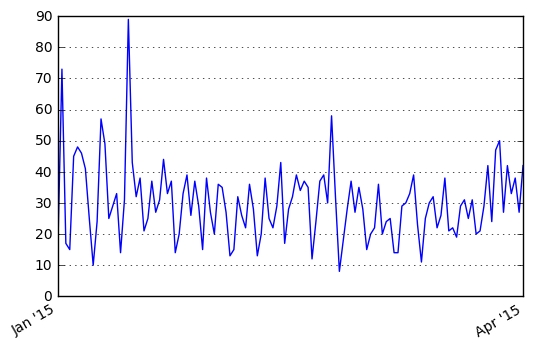

In [11]:
fig, ax = plt.subplots()
plt.plot_date(countFrame.ServiceDate,countFrame.Count, '-')
months = MonthLocator(range(1, 13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months) 
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
#ax.xaxis.grid(False, 'major')
#ax.xaxis.grid(True, 'minor')
ax.grid(True)
fig.autofmt_xdate()
plt.show()